# Overview

This notebook blah blah blah

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### Load in the data

In [2]:
#load the data through local GitHub file: 
df7030 = pd.read_csv('/Users/gilmandelbaum/GitHub/ac209a_project/data/trials_70_30.csv', header = None)
df9010 = pd.read_csv('/Users/gilmandelbaum/GitHub/ac209a_project/data/trials_90_10.csv', header = None)

In [3]:
df7030.shape  

(567, 7)

In [4]:
df9010.shape

(485, 7)

In [5]:
df7030.head(2)

,0,1,2,3,4,5,6
0,22.024,1.478,0.346,2,0.3,0.7,1
1,24.812,2.287,0.501,2,0.3,0.7,0


In [6]:
#change column names
df7030.columns = ['decision poke time(s)', 'time since last trial(s)',"time between trial initiation and decision(s)","port(1=R,2=L)","right port reward probability","left port reward probability","reward given yes=1,no=0"]
df9010.columns = ['decision poke time(s)', 'time since last trial(s)',"time between trial initiation and decision(s)","port(1=R,2=L)","right port reward probability","left port reward probability","reward given yes=1,no=0"]

In [65]:
df7030.head(10)

,decision poke time(s),time since last trial(s),time between trial initiation and decision(s),"port(1=R,2=L)",right port reward probability,left port reward probability,"reward given yes=1,no=0"
0,22.024,1.478,0.346,2,0.3,0.7,1
1,24.812,2.287,0.501,2,0.3,0.7,0
2,31.390,5.923,0.655,2,0.3,0.7,1
3,33.180,1.441,0.349,2,0.3,0.7,0
4,35.288,1.670,0.438,1,0.3,0.7,0
5,38.371,1.874,0.323,2,0.3,0.7,1
6,40.862,2.184,0.307,2,0.3,0.7,1
7,43.383,2.248,0.273,2,0.3,0.7,1
8,47.129,3.422,0.324,2,0.3,0.7,1
9,50.002,2.610,0.263,2,0.3,0.7,0


In [8]:
df9010.head(2)

,decision poke time(s),time since last trial(s),time between trial initiation and decision(s),"port(1=R,2=L)",right port reward probability,left port reward probability,"reward given yes=1,no=0"
0,0.891,0.000,0.891,1,0.9,0.1,1
1,6.640,1.523,0.540,1,0.9,0.1,1


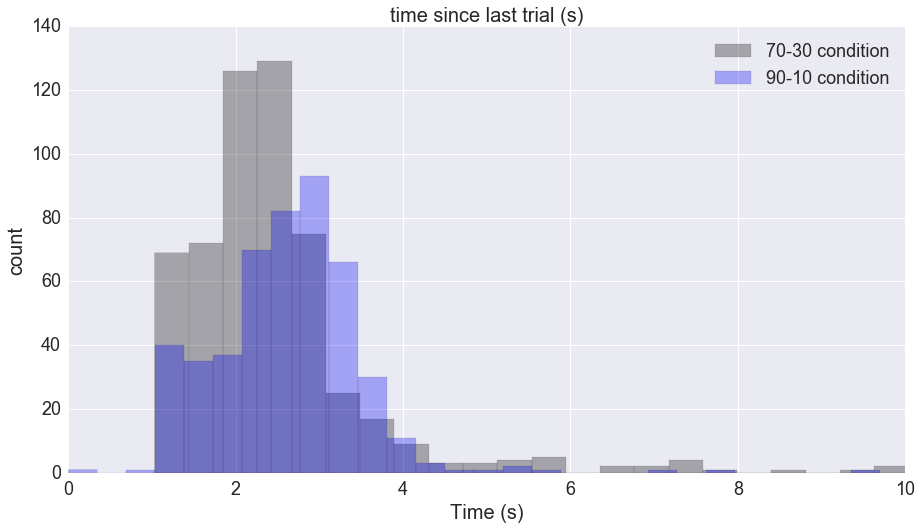

In [17]:
plt.figure(figsize=(15,8))
plt.hist(df7030.iloc [:]["time since last trial(s)"], 200, facecolor='black', alpha=0.3,label='70-30 condition')
plt.hist(df9010.iloc [:]["time since last trial(s)"], 200, facecolor='blue', alpha=0.3,label='90-10 condition')
plt.xlabel('Time (s)',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('time since last trial (s)',fontsize=20)
plt.axis([0,10,0,140]) #[xmin, xmax, ymin, ymax]
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='upper right',fontsize=18)
plt.grid(True)
plt.show()

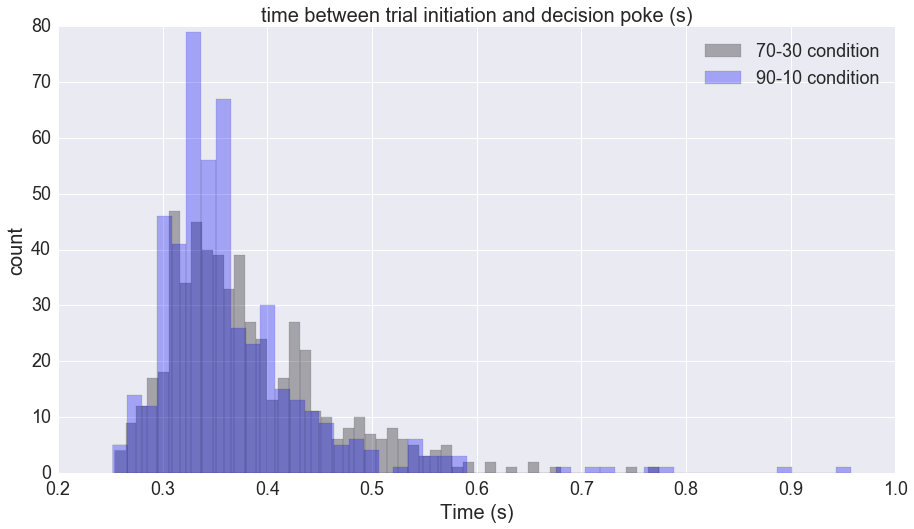

In [19]:
plt.figure(figsize=(15,8))
plt.hist(df7030.iloc [:]["time between trial initiation and decision(s)"], 50, facecolor='black', alpha=0.3,label='70-30 condition')
plt.hist(df9010.iloc [:]["time between trial initiation and decision(s)"], 50, facecolor='blue', alpha=0.3,label='90-10 condition')
plt.xlabel('Time (s)',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('time between trial initiation and decision poke (s)',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='upper right',fontsize=18)
plt.grid(True)
plt.show()

In [38]:
port = "port(1=R,2=L)"
a = (df7030.iloc[1][port])
a
n = df.shape[1]

2.0

In [93]:
from __future__ import division

def acc (df):
    
    c = 0 #define a counter  
    n = df.shape[0] #number of trials in the session 
    port = "port(1=R,2=L)" #the column of interest 
    right = "right port reward probability" #the column of interest 
    left = "left port reward probability" #the column of interest 
    
    for i in range (0,n): 
        
        if (df.iloc[i][port] == 1) & (df.iloc[i][right] >  df.iloc[i][left]): 
            #if he goes to the right (1) and the p is high in the right port
            c = c+1  
            
            
        elif (df.iloc[i][port] == 2) & (df.iloc[i][right] <  df.iloc[i][left]):
            #if he goes to the left (2) and the p is high in the left port
            c = c+1  
           
    print c  
    
    
    acc = 100*(c)/n #calc percent 
 
    return(acc)


In [94]:
acc (df9010)

435


89.69072164948453

In [95]:
acc (df7030)

444


78.3068783068783

<function matplotlib.pyplot.show>

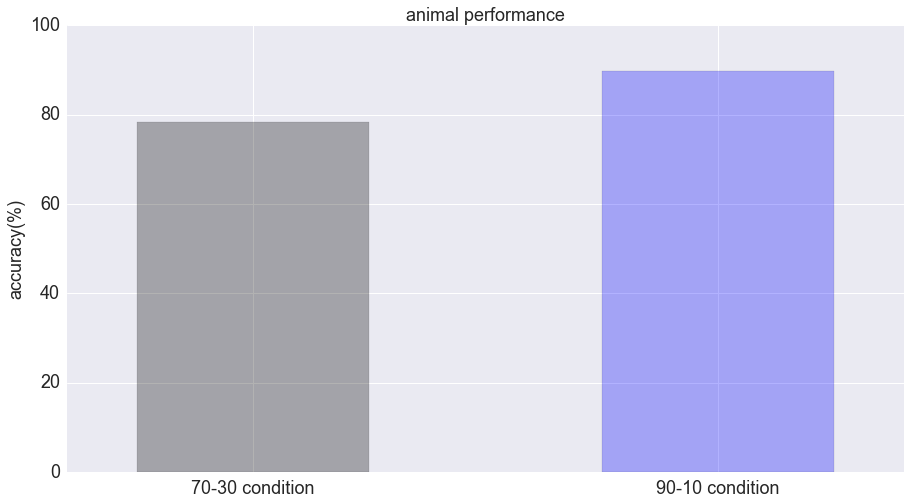

In [108]:
plt.figure(figsize=(15,8))

plt.bar((1,2), ("78.3068783068783","89.69072164948453") , width = 0.5, color=("black","blue"), align='center', alpha=0.3)

plt.xticks((1,2), ('70-30 condition','90-10 condition'),fontsize=18 )

plt.yticks(fontsize=18)
plt.ylim(0,100)


plt.ylabel('accuracy(%)',fontsize=18)
plt.title("animal performance", fontsize=18)

plt.show